In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
wine_df = pd.read_csv("winemag-data-130k-v2.csv")

In [3]:
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [59]:
varieties = wine_df['variety'].value_counts()
varieties

Pinot Noir                        12277
Chardonnay                        10868
Cabernet Sauvignon                 8839
Red Blend                          8242
Bordeaux-style Red Blend           6471
Riesling                           4773
Sauvignon Blanc                    4575
Syrah                              3826
Rosé                               3220
Merlot                             2896
Nebbiolo                           2605
Zinfandel                          2530
Sangiovese                         2462
Malbec                             2446
Portuguese Red                     2282
White Blend                        2179
Sparkling Blend                    1971
Tempranillo                        1671
Rhône-style Red Blend              1343
Pinot Gris                         1324
Champagne Blend                    1308
Cabernet Franc                     1243
Grüner Veltliner                   1200
Portuguese White                   1057
Bordeaux-style White Blend          993


In [60]:
#Here, we return the top 20 varietals since there are many, many varietals included in our dataset
top_wines_df = wine_df.loc[wine_df['variety'].isin(varieties.axes[0][:20])]
top_wines_df['variety'].describe()

count          86800
unique            20
top       Pinot Noir
freq           12277
Name: variety, dtype: object

In [35]:
top_wines_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


C:\Users\thela\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Users\thela\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\thela\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\thela\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


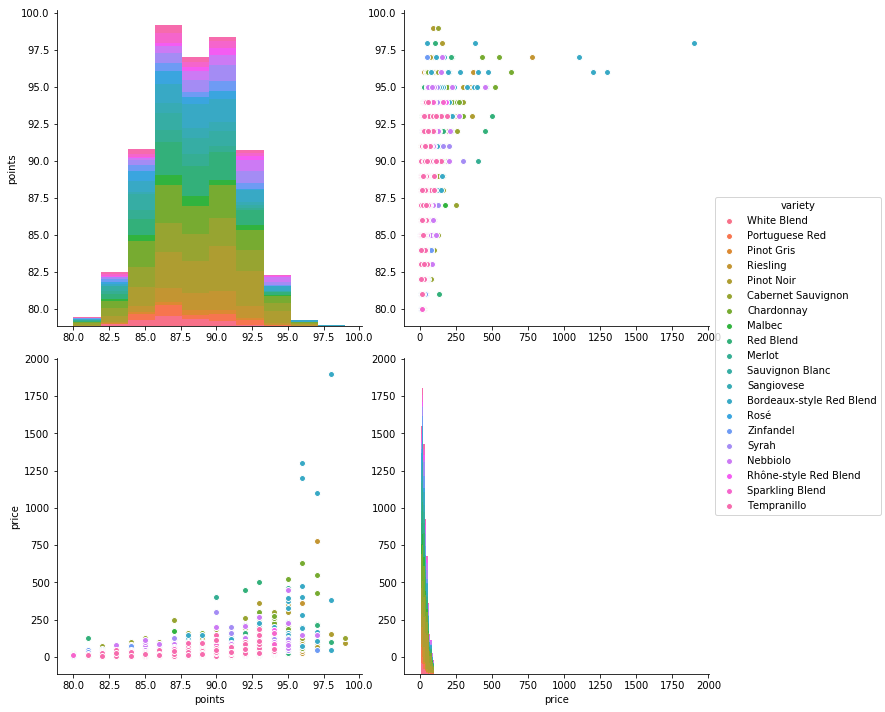

In [33]:
sns.pairplot(data = top_wines_df[:][0:10000], hue='variety', size=5)

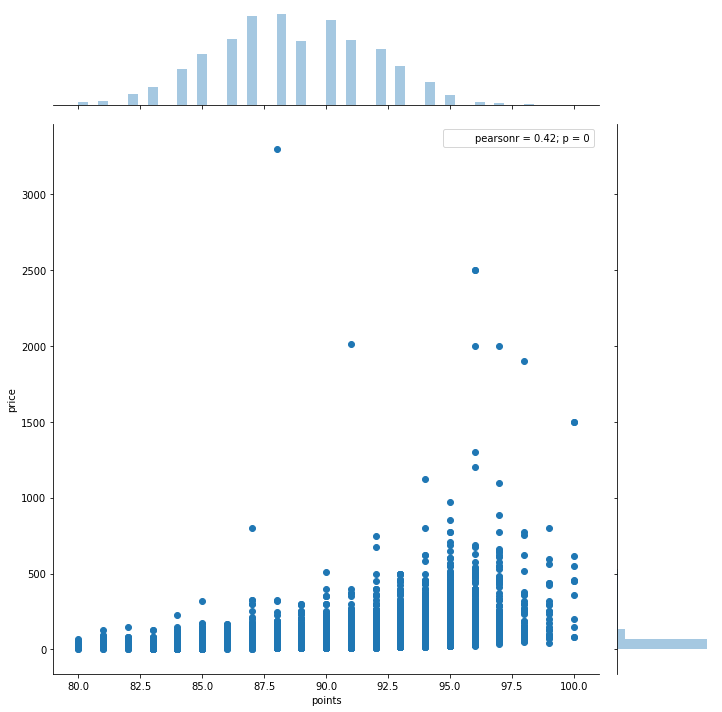

In [7]:
sns.jointplot(x='points', y='price', data=top_wines_df,size = 10)

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

C:\Users\thela\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [61]:
#Here we apply values to our varietal labels before use with our logistic regression model
le = LabelEncoder()
y = le.fit_transform(top_wines_df['variety'])
y

array([18,  8,  6, ..., 11,  7,  6], dtype=int64)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer # term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collections
from sklearn.linear_model import LogisticRegression

In [10]:
#Here, we use the Tfidf Vectorizer to figure out the importance of the words that make up the descriptions given
vect = TfidfVectorizer()
X = vect.fit_transform(top_wines_df['description'])
X

<93914x27105 sparse matrix of type '<class 'numpy.float64'>'
	with 3261558 stored elements in Compressed Sparse Row format>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 101)

In [41]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
log_pred = logmodel.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [44]:
print(classification_report(y_test,log_pred))

             precision    recall  f1-score   support

          0       0.70      0.77      0.74      2061
          1       0.62      0.76      0.68      2846
          2       0.75      0.93      0.83      3554
          3       0.68      0.47      0.56       797
          4       0.82      0.35      0.49       918
          5       0.79      0.82      0.80       867
          6       0.89      0.42      0.57       443
          7       0.70      0.87      0.77      4014
          8       0.76      0.64      0.69       757
          9       0.68      0.67      0.68      2631
         10       0.81      0.50      0.62       434
         11       0.84      0.86      0.85      1535
         12       0.80      0.77      0.78      1019
         13       0.71      0.48      0.57       832
         14       0.80      0.71      0.75      1534
         15       0.84      0.63      0.72       671
         16       0.72      0.60      0.66      1234
         17       0.62      0.44      0.51   

In [16]:
print(confusion_matrix(y_test,log_pred))

[[1592  118   22   10    7    0    0   83   58  143    1    0    9    0
     4    0    8    1    0    5]
 [  62 2162   15   38   25    1    0  279    1  113    2    0    9    1
     6    0   68   32    0   32]
 [  12    6 3307    0    0    0    4   31    1    1    0   43   12    0
    81   42    0    0   14    0]
 [  66  139    3  377    8    0    0   61   29   43    0    0    3    0
     0    0   29   37    0    2]
 [  34  264    9   16  324    5    0  164    6   44    0    2    4    3
     1    0   22   14    0    6]
 [   2   16    2    0    0  707    0   34    0   46    0    0    0   54
     1    1    1    2    0    1]
 [   1    0  144    0    0    0  184   13    0    2    0   59    8    0
    29    1    0    0    2    0]
 [ 166  117   44    5    7    0    1 3505   27   22    0   10   55    0
     7   15   17    7    0    9]
 [ 194    3    8    0    0    0    0   43  482    7    0    2   16    0
     1    0    0    0    0    1]
 [  90  216   10   39    8   77    0  155   11 1753   3

In [28]:
#Since there could be decriptions with the variety name included, lets remove any that exist and try the logistic regression model again

In [62]:
wine_stop_words = []
for variety in top_wines_df['variety'].unique():
    for word in variety.split(' '):
        wine_stop_words.append(word.lower())
wine_stop_words = pd.Series(data=wine_stop_words).unique()

In [171]:
wine_stop_words = np.append(wine_stop_words,"wine")

In [172]:
wine_stop_words

array(['white', 'blend', 'portuguese', 'red', 'pinot', 'gris', 'riesling',
       'noir', 'cabernet', 'sauvignon', 'chardonnay', 'malbec', 'merlot',
       'blanc', 'sangiovese', 'bordeaux-style', 'rosé', 'zinfandel',
       'syrah', 'nebbiolo', 'rhône-style', 'sparkling', 'tempranillo',
       'wine'], dtype=object)

In [173]:
stop_word_list = text.ENGLISH_STOP_WORDS.union(wine_stop_words)

In [14]:
from pyspark.ml.feature import StopWordsRemover

In [174]:
#Tfidf Vectorizer has a parameter called stop_list which removes any strings in the passed list. We'll use this to remove any varietal names that are present within the descriptions
vect2 = TfidfVectorizer(stop_words=list(stop_word_list)) #added in ngram_range and use_idf for alternate model run

In [175]:
X_2 = vect2.fit_transform(top_wines_df['description'])
X_2

<86800x26791 sparse matrix of type '<class 'numpy.float64'>'
	with 1943250 stored elements in Compressed Sparse Row format>

In [178]:
#Now we retrain the logistic model with a new X_2
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size = 0.3, random_state = 101)

In [179]:
logmodel2 = LogisticRegression()
logmodel2.fit(X_train_2, y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
logmodel3 = LogisticRegression(max_iter = 1000)
logmodel3.fit(X_train_2, y_train_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [180]:
pred_2 = logmodel2.predict(X_test_2)

In [26]:
pred_3 = logmodel3.predict(X_test_2)

In [52]:
accuracy_score(y_test_2, pred_3)

0.6226086956521739

In [181]:
accuracy_score(y_test_2, pred_2)

0.63498463901689706

In [37]:
log_param = {'C':[1.0,10,100,1000],'penalty':['l2'],'solver' : ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']}

In [36]:
from sklearn.model_selection import GridSearchCV

In [ ]:
log_grid2 = GridSearchCVSearchCV(LogisticRegression(),log_param, verbose = 3)

In [ ]:
log_grid2.fit(X_train_2, y_train_2)

In [38]:
log_grid = GridSearchCV(LogisticRegression(),log_param, verbose = 3)

In [39]:
log_grid.fit(X_train_2, y_train_2)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=1.0, penalty=l2, solver=newton-cg .............................


KeyboardInterrupt: 

In [2]:
log_grid.best_params_
log_grid.best_score_

NameError: name 'log_grid' is not defined

In [40]:
#So it looks like the Logistic Model's accuracy dropped to around 65% with the removal of the varietal names from the descriptions. How does a Support Vector Model do?

In [18]:
from sklearn.svm import LinearSVC, SVC

In [15]:
SVCmodel = LinearSVC()

In [16]:
count_vect = CountVectorizer(stop_words = list(wine_stop_words))

In [19]:
x_counts = count_vect.fit_transform(top_wines_df['description'])

In [26]:
x_tfidf = vect2.transform(x_counts)

AttributeError: lower not found

In [ ]:
SVCmodel.fit(X_train_2, y_train_2)
SVCmodel.predict(X_test_2)
le.classes_[SVCmodel.predict(X_test_2)[0:20]]

In [85]:
print(classification_report(y_test_2, SVCmodel.predict(X_test_2)))

             precision    recall  f1-score   support

          0       0.69      0.76      0.72      2061
          1       0.59      0.69      0.64      2846
          2       0.72      0.88      0.80      3554
          3       0.47      0.34      0.39       797
          4       0.40      0.15      0.22       918
          5       0.79      0.80      0.79       867
          6       0.72      0.32      0.44       443
          7       0.69      0.82      0.75      4014
          8       0.72      0.67      0.70       757
          9       0.65      0.65      0.65      2631
         10       0.72      0.59      0.65       434
         11       0.78      0.85      0.82      1535
         12       0.73      0.74      0.74      1019
         13       0.66      0.50      0.57       832
         14       0.73      0.66      0.70      1534
         15       0.80      0.67      0.73       671
         16       0.56      0.45      0.50      1234
         17       0.57      0.40      0.47   

In [68]:
SVCmodel.predict(X_test_2)

array([ 7,  1, 11, ...,  8,  1,  0], dtype=int64)

In [25]:
test_data = ['cherry, juicy, sweet, oak, berry, meaty, salty, fresh']

In [29]:
test_pred = vect2.transform(test_data)

In [96]:
SVCmodel.predict(test_pred)

array([13], dtype=int64)

In [97]:
le.classes_[13]

'Sangiovese'

In [98]:
SVCmodel.decision_function(test_pred)

array([[-1.0080626 , -1.21259653, -3.21195786, -1.07450494, -0.82341511,
        -1.33339447, -2.41020399, -0.94877356, -1.60275104, -0.97130952,
        -1.57375455, -2.70557195, -1.88064168, -0.64913128, -2.98547247,
        -2.10607024, -1.11750367, -1.45052463, -2.91559087, -0.99546105]])

In [63]:
accuracy_score(y_test, SVCmodel.predict(X_test_2))

0.7414019520851819

In [55]:
SVCmodel.predict(X_test)

array([ 7,  1, 11, ...,  8,  1,  0], dtype=int64)

In [59]:
le.classes_[SVCmodel.predict(X_test)[0:20]]

array(['Pinot Noir', 'Cabernet Sauvignon', 'Riesling',
       'Bordeaux-style Red Blend', 'Syrah', 'Syrah',
       'Rhône-style Red Blend', 'Chardonnay', 'Rhône-style Red Blend',
       'Portuguese Red', 'Cabernet Sauvignon', 'Rosé',
       'Rhône-style Red Blend', 'Merlot', 'Riesling', 'Chardonnay',
       'Riesling', 'Sauvignon Blanc', 'Malbec', 'Zinfandel'], dtype=object)

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
bayes = MultinomialNB()

In [28]:
bayes.fit(X_train_2, y_train_2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
pred_bayes = bayes.predict(X_test_2)

In [30]:
accuracy_score(y_test_2, pred_bayes)

0.45547471162377995

In [31]:
from sklearn.linear_model import SGDClassifier

In [32]:
sgdc = SGDClassifier(loss='hinge', random_state = 101, n_iter=5,alpha = 1e-3)

In [34]:
sgdc.fit(X_train_2, y_train_2)

C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=5,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=101, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [35]:
pred_sgdc = sgdc.predict(X_test_2)

In [36]:
accuracy_score(y_test_2, pred_sgdc)

0.5950665483584738

In [38]:
sgdc_param = {'loss':['hinge','log'],
    'penalty':['l2','l1','elasticnet'],
    'n_iter':[5],
    'alpha':np.logspace(-4, 4, 10),
    'l1_ratio':[0.05,0.06,0.07,0.08,0.09,0.1,0.12,0.13,0.14,0.15,0.2]}

In [39]:
grid = GridSearchCV(SGDClassifier(),sgdc_param, verbose=3)

In [40]:
grid.fit(X_train_2, y_train_2)

Fitting 3 folds for each of 660 candidates, totalling 1980 fits
[CV] alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l2, score=0.6208312423011999, total=   4.5s
[CV] alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l2 ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l2, score=0.6185369415415507, total=   2.8s
[CV] alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l2 ...


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s
C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l2, score=0.6227233304423244, total=   1.9s
[CV] alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l1, score=0.5505725626169077, total=   3.2s
[CV] alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l1, score=0.5462967188426961, total=   3.6s
[CV] alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l1, score=0.5387775596841192, total=   2.8s
[CV] alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=elasticnet, score=0.613394771659291, total=   4.2s
[CV] alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6119654999315475, total=   4.9s
[CV] alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6122244031588077, total=   7.4s
[CV] alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=l2, score=0.5665860668826133, total=   4.2s
[CV] alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=l2, score=0.5701181946789577, total=   2.6s
[CV] alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=l2, score=0.5692700963162459, total=   2.2s
[CV] alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=l1, score=0.5575528080660614, total=   4.8s
[CV] alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=l1, score=0.5587550768949938, total=   5.7s
[CV] alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=l1, score=0.5570365636554526, total=   4.3s
[CV] alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=elasticnet, score=0.561065742050276, total=   4.6s
[CV] alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=elasticnet, score=0.5668781088851367, total=   5.3s
[CV] alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.05, loss=log, n_iter=5, penalty=elasticnet, score=0.5660747706212627, total=   5.2s
[CV] alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l2, score=0.6249828915552716, total=   1.6s
[CV] alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l2, score=0.6213206772235659, total=   1.8s
[CV] alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l2, score=0.6252339434883827, total=   2.3s
[CV] alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l1, score=0.5533099137734385, total=   3.1s
[CV] alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l1, score=0.5335189157121344, total=   2.9s
[CV] alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l1, score=0.5309718354863742, total=   2.8s
[CV] alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6114786258497195, total=   3.9s
[CV] alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6105964495961301, total=   4.0s
[CV] alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=elasticnet, score=0.613365590907016, total=   4.3s
[CV] alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=l2, score=0.5659929741320315, total=   2.8s
[CV] alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=l2, score=0.5694793045224296, total=   3.0s
[CV] alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=l2, score=0.5669877208198293, total=   3.0s
[CV] alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=l1, score=0.5599708015876637, total=   5.5s
[CV] alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=l1, score=0.5567471364030484, total=  13.6s
[CV] alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=l1, score=0.5576299812845209, total=  10.6s
[CV] alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=elasticnet, score=0.5591952187599799, total=  12.0s
[CV] alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=elasticnet, score=0.5667868388627755, total=   4.7s
[CV] alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.06, loss=log, n_iter=5, penalty=elasticnet, score=0.5673072533893276, total=  13.7s
[CV] alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l2, score=0.6227473881107715, total=   3.9s
[CV] alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l2, score=0.6197690868434262, total=   2.7s
[CV] alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l2, score=0.6221755603231843, total=   3.2s
[CV] alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l1, score=0.5428167343400703, total=   2.9s
[CV] alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l1, score=0.5400903573221375, total=   3.8s
[CV] alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l1, score=0.5408316976308942, total=   2.9s
[CV] alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6090150098088416, total=   5.4s
[CV] alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6126956601104367, total=   3.7s
[CV] alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=elasticnet, score=0.608846487424111, total=   4.3s
[CV] alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=l2, score=0.5649892787079702, total=   4.1s
[CV] alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=l2, score=0.5708027198466664, total=   2.3s
[CV] alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=l2, score=0.566257360660976, total=   2.2s
[CV] alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=l1, score=0.5600164241069392, total=   4.7s
[CV] alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=l1, score=0.558207456760827, total=   7.9s
[CV] alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=l1, score=0.5575386862646643, total=   4.9s
[CV] alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=elasticnet, score=0.5593320863178065, total=   7.2s
[CV] alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=elasticnet, score=0.568247159220554, total=   6.9s
[CV] alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.07, loss=log, n_iter=5, penalty=elasticnet, score=0.5663486556808326, total=   5.1s
[CV] alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l2, score=0.6240248186504859, total=   1.9s
[CV] alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l2, score=0.6205448820334961, total=   1.9s
[CV] alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l2, score=0.621582142694116, total=   2.1s
[CV] alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l1, score=0.543501072129203, total=   3.0s
[CV] alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l1, score=0.5407748824898462, total=   3.0s
[CV] alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l1, score=0.5368147167572009, total=   3.3s
[CV] alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6067795063643414, total=   4.1s
[CV] alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6067631086569616, total=   5.0s
[CV] alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6086638973843976, total=   4.0s
[CV] alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=l2, score=0.5665860668826133, total=   2.4s
[CV] alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=l2, score=0.5684296992652763, total=   2.3s
[CV] alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=l2, score=0.5690418587666043, total=   2.6s
[CV] alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=l1, score=0.5609288744924494, total=   4.4s
[CV] alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=l1, score=0.5557431661570758, total=   4.6s
[CV] alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=l1, score=0.5585429314830876, total=   5.3s
[CV] alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=elasticnet, score=0.5600164241069392, total=   7.4s
[CV] alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=elasticnet, score=0.5647788983708301, total=  11.1s
[CV] alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.08, loss=log, n_iter=5, penalty=elasticnet, score=0.5631076824759209, total=  13.2s
[CV] alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l2, score=0.6216068251288837, total=   2.8s
[CV] alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l2, score=0.6203623419887738, total=   1.7s
[CV] alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l2, score=0.6245035833295294, total=   1.3s
[CV] alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l1, score=0.5479720790182034, total=   2.3s
[CV] alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l1, score=0.5344772509469264, total=   2.2s
[CV] alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l1, score=0.5393709773131876, total=   6.7s
[CV] alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6078744468269538, total=   9.0s
[CV] alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=elasticnet, score=0.605211518276822, total=   8.9s
[CV] alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6083443648148994, total=   8.0s
[CV] alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=l2, score=0.5661754642091337, total=   5.1s
[CV] alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=l2, score=0.5718523251038197, total=   5.1s
[CV] alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=l2, score=0.5686766786871776, total=   4.9s
[CV] alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=l1, score=0.5600620466262147, total=  11.5s
[CV] alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=l1, score=0.5583443617943686, total=  11.2s
[CV] alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=l1, score=0.5565800885561693, total=   8.6s
[CV] alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=elasticnet, score=0.5583740134130206, total=  10.2s
[CV] alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=elasticnet, score=0.5645963583261078, total=  12.7s
[CV] alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.09, loss=log, n_iter=5, penalty=elasticnet, score=0.5627881499064226, total=  13.4s
[CV] alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l2 ....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l2, score=0.6220630503216388, total=   2.4s
[CV] alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l2 ....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l2, score=0.6199972618993291, total=   2.7s
[CV] alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l2 ....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l2, score=0.619528004747341, total=   3.8s
[CV] alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l1 ....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l1, score=0.5447328801496418, total=   6.0s
[CV] alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l1 ....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l1, score=0.543284808104778, total=   3.0s
[CV] alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l1 ....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l1, score=0.542292417948601, total=   5.7s
[CV] alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6061864136137598, total=   8.6s
[CV] alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6058047734221695, total=   8.7s
[CV] alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=elasticnet, score=0.606244579358196, total=   9.1s
[CV] alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=l2 ......


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=l2, score=0.5650805237465213, total=   4.7s
[CV] alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=l2 ......


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=l2, score=0.572034865148542, total=   5.6s
[CV] alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=l2 ......


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=l2, score=0.570913406673666, total=   4.5s
[CV] alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=l1 ......


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=l1, score=0.5606551393767963, total=  10.7s
[CV] alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=l1 ......


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=l1, score=0.5569296764477707, total=   7.7s
[CV] alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=l1 ......


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=l1, score=0.5581777514036609, total=  12.1s
[CV] alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=elasticnet, score=0.5592408412792554, total=  14.2s
[CV] alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=elasticnet, score=0.5629534979236069, total=  11.0s
[CV] alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.1, loss=log, n_iter=5, penalty=elasticnet, score=0.5637467476149176, total=  12.3s
[CV] alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=l2, score=0.6217893152059857, total=   3.5s
[CV] alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=l2, score=0.619586546798704, total=   3.9s
[CV] alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=l2, score=0.6202583649061943, total=   2.5s
[CV] alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=l1, score=0.5455540854966011, total=   5.9s
[CV] alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=l1, score=0.5411855975904714, total=   6.7s
[CV] alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=l1, score=0.5347149313004975, total=   5.5s
[CV] alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5994799032802591, total=   9.9s
[CV] alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6032035777848765, total=   8.1s
[CV] alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6025927785639293, total=   8.6s
[CV] alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=l2, score=0.5621150599936129, total=   4.4s
[CV] alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=l2, score=0.5700269246565965, total=   4.5s
[CV] alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=l2, score=0.570365636554526, total=   5.7s
[CV] alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=l1, score=0.559468953875633, total=   8.8s
[CV] alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=l1, score=0.5569296764477707, total=   9.6s
[CV] alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=l1, score=0.5578582188341626, total=   9.2s
[CV] alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=elasticnet, score=0.5584196359322962, total=  11.5s
[CV] alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=elasticnet, score=0.5632273079906904, total=  11.6s
[CV] alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.12, loss=log, n_iter=5, penalty=elasticnet, score=0.562833797416351, total=  11.2s
[CV] alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=l2, score=0.6213330900132306, total=   3.2s
[CV] alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=l2, score=0.6193583717428011, total=   3.0s
[CV] alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=l2, score=0.6231341580316794, total=   3.3s
[CV] alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=l1, score=0.5474702313061727, total=   6.4s
[CV] alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=l1, score=0.5443344133619312, total=   3.2s
[CV] alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=l1, score=0.5438444332861643, total=   3.8s
[CV] alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6025366120717186, total=   8.8s
[CV] alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=elasticnet, score=0.601971432483001, total=   3.9s
[CV] alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6016341808554343, total=   3.4s
[CV] alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=l2, score=0.5675897623066746, total=   2.5s
[CV] alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=l2, score=0.5715785150367362, total=   2.7s
[CV] alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=l2, score=0.5682202035878943, total=   2.3s
[CV] alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=l1, score=0.5614307222044801, total=  11.0s
[CV] alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=l1, score=0.5580705517272851, total=  10.1s
[CV] alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=l1, score=0.5568083261058109, total=  10.6s
[CV] alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=elasticnet, score=0.557780920662439, total=  11.1s
[CV] alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=elasticnet, score=0.562725322867704, total=   5.9s
[CV] alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.13, loss=log, n_iter=5, penalty=elasticnet, score=0.5638380426347743, total=   7.2s
[CV] alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=l2, score=0.6224280304758428, total=   2.5s
[CV] alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=l2, score=0.6203167069775932, total=   3.0s
[CV] alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=l2, score=0.6223581503628977, total=   1.8s
[CV] alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=l1, score=0.5451891053423971, total=   4.7s
[CV] alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=l1, score=0.5369871765618582, total=   5.8s
[CV] alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=l1, score=0.5383210845848359, total=   5.2s
[CV] alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=elasticnet, score=0.600711711300698, total=   8.6s
[CV] alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5996440469127915, total=   6.3s
[CV] alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6025927785639293, total=   3.1s
[CV] alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=l2, score=0.5650349012272458, total=   4.3s
[CV] alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=l2, score=0.5713047049696527, total=   5.2s
[CV] alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=l2, score=0.5693157438261743, total=   3.2s
[CV] alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=l1, score=0.5590127286828779, total=   5.6s
[CV] alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=l1, score=0.558298726783188, total=   9.9s
[CV] alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=l1, score=0.5584972839731592, total=   4.5s
[CV] alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=elasticnet, score=0.5566403576805511, total=  10.5s
[CV] alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=elasticnet, score=0.5594852370738831, total=  11.5s
[CV] alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.14, loss=log, n_iter=5, penalty=elasticnet, score=0.560779659469576, total=  11.5s
[CV] alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=l2, score=0.622793010630047, total=   3.7s
[CV] alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=l2, score=0.6206817870670378, total=   2.8s
[CV] alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=l2 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=l2, score=0.621992970283471, total=   1.9s
[CV] alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=l1, score=0.5449609927460194, total=   3.2s
[CV] alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=l1, score=0.537991146807831, total=   4.3s
[CV] alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=l1 ...


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=l1, score=0.5388688547039759, total=   6.4s
[CV] alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6004835987043204, total=   7.3s
[CV] alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=elasticnet, score=0.600784922192306, total=   8.3s
[CV] alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=hinge, n_iter=5, penalty=elasticnet, score=0.6028666636234994, total=   7.3s
[CV] alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=l2, score=0.5643961859573886, total=   5.7s
[CV] alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=l2, score=0.5713047049696527, total=   4.3s
[CV] alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=l2 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=l2, score=0.566942073309901, total=   4.5s
[CV] alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=l1, score=0.5588302386057759, total=   9.7s
[CV] alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=l1, score=0.5577967416602017, total=  12.3s
[CV] alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=l1 .....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=l1, score=0.5594558816816543, total=   6.1s
[CV] alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=elasticnet, score=0.559468953875633, total=  10.5s
[CV] alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=elasticnet, score=0.5605348423310363, total=   6.8s
[CV] alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.15, loss=log, n_iter=5, penalty=elasticnet, score=0.5591819966220842, total=   6.1s
[CV] alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=l2 ....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=l2, score=0.6227473881107715, total=   2.2s
[CV] alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=l2 ....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=l2, score=0.6185825765527313, total=   2.2s
[CV] alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=l2 ....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=l2, score=0.6224494453827544, total=   1.7s
[CV] alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=l1 ....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=l1, score=0.5446416351110909, total=   3.1s
[CV] alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=l1 ....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=l1, score=0.545886003742071, total=   3.2s
[CV] alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=l1 ....


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=l1, score=0.5342128086912858, total=   5.1s
[CV] alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5949176513527077, total=   4.6s
[CV] alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5927987952357048, total=   3.3s
[CV] alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5956543570548226, total=   3.7s
[CV] alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=l2 ......


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=l2, score=0.5619325699165107, total=   2.6s
[CV] alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=l2 ......


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=l2, score=0.5700269246565965, total=   2.5s
[CV] alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=l2 ......


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=l2, score=0.5691788012963893, total=   2.1s
[CV] alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=l1 ......


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=l1, score=0.5598339340298372, total=   7.2s
[CV] alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=l1 ......


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=l1, score=0.5572947565372154, total=  12.4s
[CV] alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=l1 ......


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=l1, score=0.5559410234171726, total=  11.4s
[CV] alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=elasticnet, score=0.5557735298143164, total=  11.7s
[CV] alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=elasticnet, score=0.5593483320403414, total=  10.8s
[CV] alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.0001, l1_ratio=0.2, loss=log, n_iter=5, penalty=elasticnet, score=0.5599123567809376, total=  10.3s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l2, score=0.5948720288334322, total=   3.2s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l2, score=0.591384109889107, total=   3.2s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l2, score=0.5915460811612726, total=   2.4s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l1, score=0.2671198503581368, total=   3.8s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l1, score=0.272669191803952, total=   4.3s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=l1, score=0.21851463002693203, total=   3.8s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=elasticnet, score=0.553173046215612, total=   7.6s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5568840414365902, total=   7.5s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5485461268087826, total=   4.8s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=l2, score=0.41995528993111, total=   4.0s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=l2, score=0.42499885912472046, total=   5.1s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=l2, score=0.419774501300954, total=   5.5s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=l1, score=0.36310963091381904, total=   9.3s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=l1, score=0.3589193629352439, total=   9.0s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=l1, score=0.36531702195645227, total=   9.6s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=elasticnet, score=0.40937086545919066, total=   6.6s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=elasticnet, score=0.41094327568110256, total=  10.1s
[CV] alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.05, loss=log, n_iter=5, penalty=elasticnet, score=0.4053498881636007, total=  10.1s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l2, score=0.5966969296044528, total=   3.0s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l2, score=0.5902432346095925, total=   3.3s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l2, score=0.5928698589491943, total=   2.4s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l1, score=0.22104110588986725, total=   5.0s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l1, score=0.22005202391274586, total=   4.9s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=l1, score=0.3015930980964988, total=   5.4s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5502075824627036, total=   6.1s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5459316387532515, total=   7.0s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5417446478294609, total=   6.7s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=l2, score=0.4208677403166203, total=   4.8s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=l2, score=0.42426869894583125, total=   5.1s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=l2, score=0.4187702560825307, total=   3.5s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=l1, score=0.36114786258497195, total=   8.7s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=l1, score=0.36234198877378726, total=   9.2s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=l1, score=0.3641301866983156, total=   9.3s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=elasticnet, score=0.40677038186048636, total=  10.2s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=elasticnet, score=0.40861589011089305, total=  10.7s
[CV] alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.06, loss=log, n_iter=5, penalty=elasticnet, score=0.4034326927466107, total=  10.5s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l2, score=0.5948264063141566, total=   3.1s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l2, score=0.5933007803586912, total=   3.0s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l2, score=0.5911352535719177, total=   3.0s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l1, score=0.25685478352114605, total=   5.2s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l1, score=0.18025829416328207, total=   4.2s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=l1, score=0.2829689140457388, total=   5.0s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5405356083762946, total=   7.2s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=elasticnet, score=0.540044722310957, total=   7.3s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5385949696444059, total=   6.9s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=l2, score=0.4209133628358958, total=   4.1s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=l2, score=0.4246794140464564, total=   4.9s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=l2, score=0.41826813347331904, total=   4.9s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=l1, score=0.36206031297048225, total=   9.2s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=l1, score=0.36421302423219093, total=   9.3s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=l1, score=0.3606609759437623, total=   9.3s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=elasticnet, score=0.40467174597381267, total=  10.0s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=elasticnet, score=0.4055127093506138, total=   9.4s
[CV] alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.07, loss=log, n_iter=5, penalty=elasticnet, score=0.40242844752818735, total=  10.4s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l2, score=0.5955107441032894, total=   3.1s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l2, score=0.5907452197325789, total=   3.0s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l2, score=0.5906787784726343, total=   2.2s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l1, score=0.2950864546740271, total=   4.0s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l1, score=0.2540501072422763, total=   4.0s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=l1, score=0.17396266033687863, total=   3.5s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5366120717186003, total=   4.6s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5357550312599827, total=   6.7s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5306523029168759, total=   7.0s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=l2, score=0.42077649527806926, total=   4.4s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=l2, score=0.42504449413590106, total=   5.3s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=l2, score=0.4179029533938924, total=   4.0s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=l1, score=0.36142159770062504, total=   5.6s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=l1, score=0.36051658832656414, total=  11.7s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=l1, score=0.36349112155931895, total=  10.2s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=elasticnet, score=0.4037136730690269, total=  11.2s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=elasticnet, score=0.4055583443617944, total=  11.4s
[CV] alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.08, loss=log, n_iter=5, penalty=elasticnet, score=0.399643949422559, total=  10.4s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l2, score=0.5960582143345956, total=   3.4s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l2, score=0.5885547391959111, total=   1.8s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l2, score=0.5925959738896244, total=   2.5s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l1, score=0.22879693416670469, total=   2.1s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l1, score=0.2741295121617305, total=   2.4s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=l1, score=0.2948829141370338, total=   2.7s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5286737533646608, total=   5.5s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=elasticnet, score=0.523935563364213, total=   4.5s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5278221573013192, total=   5.4s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=l2, score=0.42200830329850814, total=   2.5s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=l2, score=0.42203258339798294, total=   5.6s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=l2, score=0.418405076003104, total=   4.5s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=l1, score=0.36374834618367624, total=   9.9s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=l1, score=0.35786975767809065, total=   9.0s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=l1, score=0.36390194914867396, total=  11.1s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=elasticnet, score=0.4012956795474246, total=  10.8s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=elasticnet, score=0.4044631040934605, total=  11.7s
[CV] alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.09, loss=log, n_iter=5, penalty=elasticnet, score=0.399096179303419, total=   9.7s
[CV] alpha=0.000774263682681127, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l2, score=0.5913590948492176, total=   3.2s
[CV] alpha=0.000774263682681127, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l2, score=0.5945329256605668, total=   3.4s
[CV] alpha=0.000774263682681127, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l2 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l2, score=0.5936915141279043, total=   2.3s
[CV] alpha=0.000774263682681127, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l1, score=0.2529312468634518, total=   2.6s
[CV] alpha=0.000774263682681127, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l1, score=0.2497147811801214, total=   2.5s
[CV] alpha=0.000774263682681127, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l1 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=l1, score=0.22905920482037706, total=   2.1s
[CV] alpha=0.000774263682681127, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[CV]  alpha=0.000774263682681127, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=elasticnet, score=0.5224234682239153, total=   3.6s
[CV] alpha=0.000774263682681127, l1_ratio=0.1, loss=hinge, n_iter=5, penalty=elasticnet 


C:\Users\thela\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


KeyboardInterrupt: 

In [29]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, random_state=42,
                                            max_iter=5, tol=None)),
 ])

In [33]:
vect3 = CountVectorizer()
tfidf = TfidfTransformer()
clf2 = SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, random_state=42,
                                            max_iter=5, tol=None)

In [34]:
xtesting = vect3.fit_transform(top_wines_df['description'])

In [36]:
xtrans = tfidf.fit(xtesting)

In [37]:
xtransidf = xtrans.transform(xtesting)

In [38]:
clf2.fit(X_train_2, y_train_2)          


SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [41]:
clf2.predict(X_test_2)

array([ 7,  1, 11, ...,  8,  7,  0], dtype=int64)

In [42]:
print(classification_report(y_test_2,clf2.predict(X_test_2)))

             precision    recall  f1-score   support

          0       0.56      0.75      0.64      2061
          1       0.53      0.64      0.58      2846
          2       0.55      0.90      0.68      3554
          3       0.43      0.18      0.25       797
          4       0.16      0.04      0.06       918
          5       0.62      0.78      0.69       867
          6       0.74      0.04      0.07       443
          7       0.60      0.77      0.67      4014
          8       0.79      0.41      0.54       757
          9       0.53      0.59      0.56      2631
         10       0.70      0.46      0.56       434
         11       0.65      0.77      0.71      1535
         12       0.67      0.53      0.60      1019
         13       0.76      0.19      0.30       832
         14       0.66      0.42      0.51      1534
         15       0.78      0.30      0.43       671
         16       0.44      0.27      0.33      1234
         17       0.63      0.20      0.31   

In [43]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [44]:
classifier = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('ifidf', TfidfTransformer()),
    ('model', OneVsRestClassifier(LinearSVC()))
])

In [19]:
model = LinearSVC()

In [20]:
model.fit(X_train_2, y_train_2)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [21]:
model.predict(X_test_2)

array([ 7,  1, 11, ...,  8,  1,  0], dtype=int64)

In [23]:
print(classification_report(y_test_2, model.predict(X_test_2)))

             precision    recall  f1-score   support

          0       0.69      0.76      0.72      2061
          1       0.59      0.69      0.64      2846
          2       0.72      0.88      0.80      3554
          3       0.47      0.34      0.39       797
          4       0.40      0.15      0.22       918
          5       0.79      0.80      0.79       867
          6       0.72      0.32      0.44       443
          7       0.69      0.82      0.75      4014
          8       0.72      0.67      0.70       757
          9       0.65      0.65      0.65      2631
         10       0.72      0.59      0.65       434
         11       0.78      0.85      0.82      1535
         12       0.73      0.74      0.74      1019
         13       0.66      0.50      0.57       832
         14       0.73      0.66      0.70      1534
         15       0.80      0.67      0.73       671
         16       0.56      0.45      0.50      1234
         17       0.57      0.40      0.47   

In [30]:
model.predict(test_pred)

array([13], dtype=int64)

In [33]:
def tokens(x):
    return x.split(',')

In [35]:
x = TfidfVectorizer(tokenizer=tokens)

In [176]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction import text
lda = LDA(learning_method='batch',n_components=20)
topics = lda.fit_transform(X_2)

In [163]:
def print_topics(topics, feature_names, sorting, topics_per_chunk=5,
                 n_words=10):
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {!s:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{!s:<14}" * (len_this_chunk)).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")

In [177]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect2.get_feature_names())
        
print_topics(topics=range(20), feature_names=feature_names, sorting=sorting)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
fruits        like          finish        pair          touriga       
tannins       flavors       aromas        spice         nacional      
drink         bodied        berry         fruit         tinta         
ripe          sweet         flavors       aromas        roriz         
wood          alcohol       blackberry    cherry        alicante      
acidity       tastes        plum          tones         bouschet      
fruit         texture       palate        bright        castelão      
aging         cherry        black         offers        serving       
rich          soft          oak           dishes        franca        
structure     ripe          drink         almond        deux          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
acid

In [86]:
len(feature_names)

26792

In [116]:
len(topics)

86800

In [148]:
len(sorting)

10

In [150]:
len(lda.components_)

10

In [157]:
len(np.argsort(lda.components_, axis=1)[:, ::-1])

10